<a href="https://colab.research.google.com/github/michellewang1204/stock_process/blob/main/week3_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install beautifulsoup4 requests

In [2]:
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

--2024-10-01 08:24:24--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 173.194.212.113, 173.194.212.101, 173.194.212.100, ...
Connecting to drive.google.com (drive.google.com)|173.194.212.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_ [following]
--2024-10-01 08:24:24--  https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.251.107.132, 2607:f8b0:400c:c32::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.251.107.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20659344 (20M) [application/octet-stream]
Saving to: ‘TaipeiSansTCBeta-Regular.ttf’

TaipeiSansTCBeta-Re 100%[===================>]  19.70M  84.5MB/s    in 0.2s    

2024-10-01 

In [3]:
!pip install mplfinance

In [4]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
import matplotlib.font_manager as fm
import matplotlib


# **API抓取**

In [5]:
# 將民國年轉換為西元年
def convert_to_ad(date_str):
    # 將民國年轉換為西元年
    parts = date_str.split('/')
    parts[0] = str(int(parts[0]) + 1911)  # 民國轉西元 (例如 112 + 1911 = 2023)
    return '/'.join(parts)

In [6]:
# 定義函數來抓取指定月份的股票數據
def fetch_stock_data(date, stock_no):
    url = f"https://www.twse.com.tw/exchangeReport/STOCK_DAY?response=json&date={date}&stockNo={stock_no}"
    response = requests.get(url)
    data = response.json()
    return pd.DataFrame(data['data'], columns=data['fields'])

In [7]:
def fetch_multiple_months(stock_id, start_year, start_month, end_year, end_month):
    all_data = []

    # 從起始年月到結束年月逐月抓取
    year,month = start_year, start_month

    while (year < end_year) or (year == end_year and month <= end_month):
        # 格式化日期
        date = f"{year}{str(month).zfill(2)}01"
        print(f"Fetching data for {year}-{str(month).zfill(2)}")
        # 抓取當前月份的數據
        df = fetch_stock_data(date, stock_id)

        # 將數據添加到列表中
        if df is not None:
            all_data.append(df)

        # 移動到下一個月
        month += 1
        if month > 12:
            month = 1
            year += 1

    # 將每月資料合併成一個 DataFrame
    if all_data:
        return pd.concat(all_data, ignore_index=True)
    else:
        return pd.DataFrame()

df = fetch_multiple_months('6214', 2022, 1, 2024, 9)
print(df)

Fetching data for 2022-01
Fetching data for 2022-02
Fetching data for 2022-03
Fetching data for 2022-04
Fetching data for 2022-05
Fetching data for 2022-06
Fetching data for 2022-07
Fetching data for 2022-08
Fetching data for 2022-09
Fetching data for 2022-10
Fetching data for 2022-11
Fetching data for 2022-12
Fetching data for 2023-01
Fetching data for 2023-02
Fetching data for 2023-03
Fetching data for 2023-04
Fetching data for 2023-05
Fetching data for 2023-06
Fetching data for 2023-07
Fetching data for 2023-08
Fetching data for 2023-09
Fetching data for 2023-10
Fetching data for 2023-11
Fetching data for 2023-12
Fetching data for 2024-01
Fetching data for 2024-02
Fetching data for 2024-03
Fetching data for 2024-04
Fetching data for 2024-05
Fetching data for 2024-06
Fetching data for 2024-07
Fetching data for 2024-08
Fetching data for 2024-09
            日期     成交股數        成交金額     開盤價     最高價     最低價     收盤價   漲跌價差  \
0    111/01/03  134,547  11,396,657   84.50   84.80   84.50   84

In [8]:
# 資料處理，將日期轉換為正確格式
df['日期'] = df['日期'].apply(convert_to_ad)
df['日期'] = pd.to_datetime(df['日期'], format='%Y/%m/%d')
df.iloc[:, 1:] = df.iloc[:, 1:].apply(lambda x: pd.to_numeric(x.str.replace(',', ''), errors='coerce'))

# 重新命名欄位
df.rename(columns={
    '日期': 'Date',
    '開盤價': 'Open',
    '最高價': 'High',
    '最低價': 'Low',
    '收盤價': 'Close',
    '成交股數': 'Volume'
}, inplace=True)

print(df)

          Date  Volume      成交金額   Open   High    Low  Close 漲跌價差 成交筆數
0   2022-01-03  134547  11396657   84.5   84.8   84.5   84.6 -0.2  137
1   2022-01-04  165960  14023219   84.6   84.9   84.3   84.5 -0.1  191
2   2022-01-05  102807   8664903   84.5   84.5   84.1   84.5  0.0  139
3   2022-01-06  126382  10646269   84.2   84.3   84.1   84.1 -0.4  124
4   2022-01-07  178977  15062036   84.2   84.5   84.0   84.1  0.0  583
..         ...     ...       ...    ...    ...    ...    ...  ...  ...
660 2024-09-24  439562  56211736  130.0  130.0  127.0  127.0 -3.0  515
661 2024-09-25  363389  46479740  128.0  129.0  127.0  127.0  0.0  531
662 2024-09-26  296012  37987580  128.5  129.5  127.5  127.5  0.5  373
663 2024-09-27  387013  49504853  128.0  128.5  127.0  127.5  0.0  366
664 2024-09-30  449067  57157815  127.5  128.5  126.5  127.0 -0.5  374

[665 rows x 9 columns]


<Figure size 1000x600 with 0 Axes>

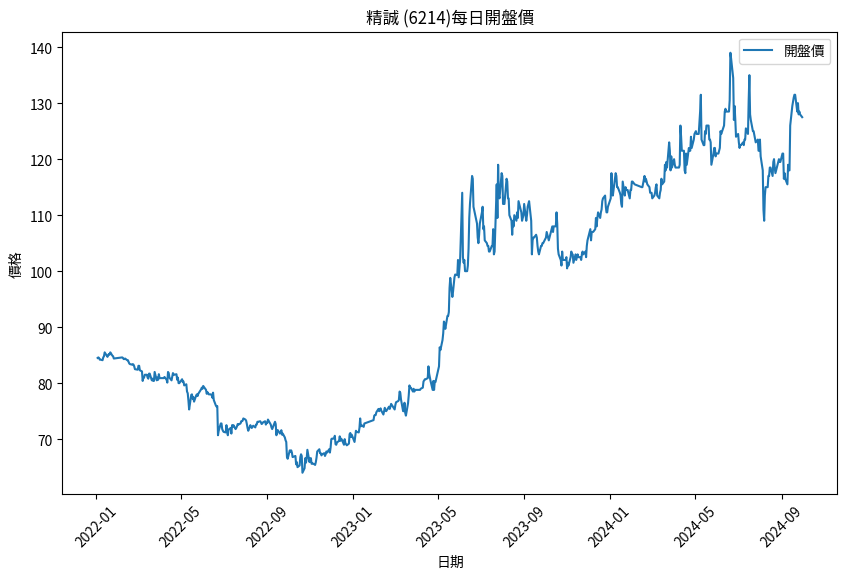

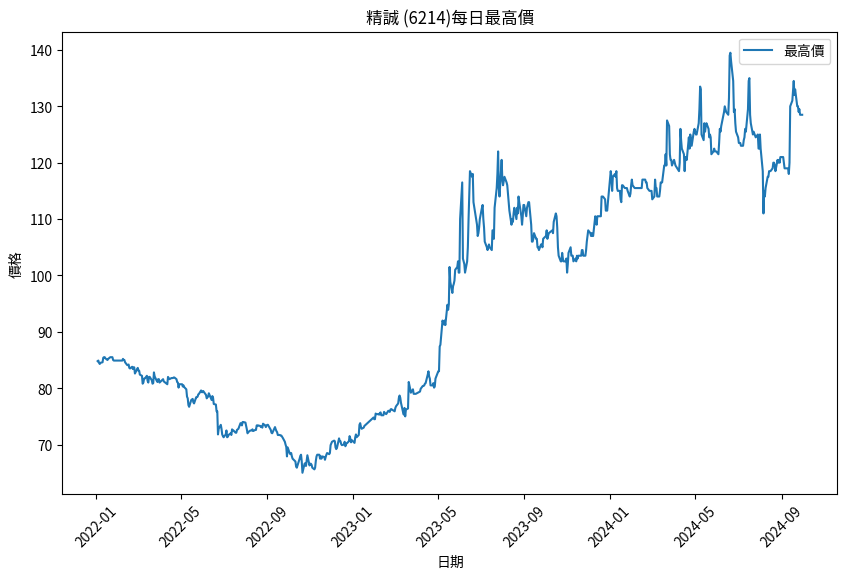

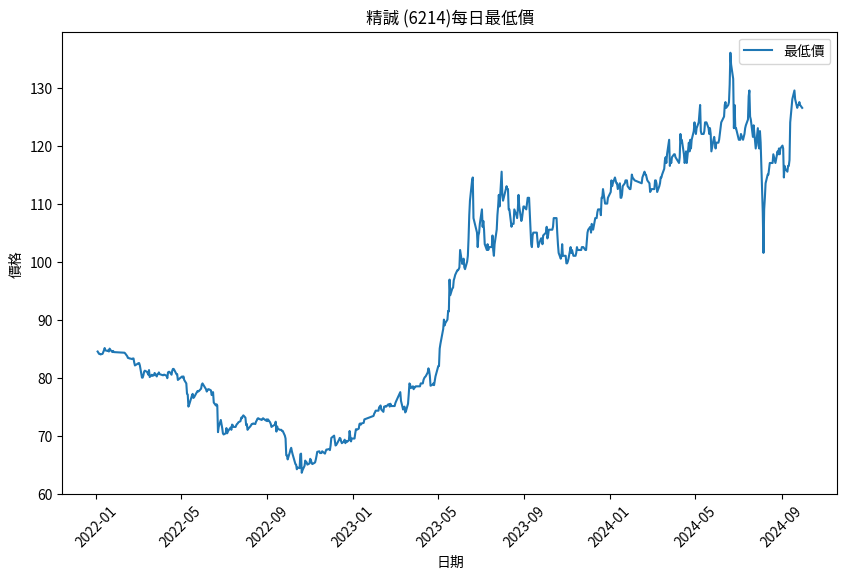

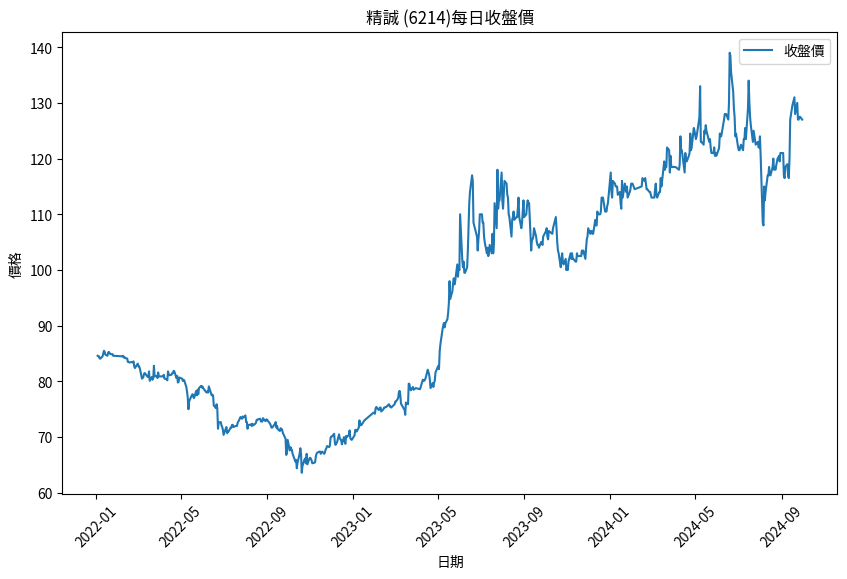

In [9]:
matplotlib.font_manager.fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
matplotlib.rc('font', family='Taipei Sans TC Beta')

# 定義一個繪製函數
def plot_stock_data(df, column_name, label_name, stock_name):
  plt.figure(figsize=(10, 6))
  plt.plot(df['Date'], df[column_name], label=label_name)
  # 設定圖表標題和軸標籤
  plt.title(f'{stock_name}每日{label_name}')
  plt.xlabel('日期')
  plt.ylabel('價格')
  plt.xticks(rotation=45)
  plt.legend()
  plt.show()

# 繪製收盤價圖表
plt.figure(figsize=(10, 6))
# 使用定義的函數繪製各個欄位
plot_stock_data(df, 'Open', '開盤價', '精誠 (6214)')
plot_stock_data(df, 'High', '最高價', '精誠 (6214)')
plot_stock_data(df, 'Low', '最低價', '精誠 (6214)')
plot_stock_data(df, 'Close', '收盤價', '精誠 (6214)')

# **Yahoo 奇摩抓取股票資料**

In [10]:
import yfinance as yf

# 從 Yahoo Finance 抓取股票數據 (以 AAPL 為例)
df_yahoo = yf.download('AAPL', start='2022-01-01', end='2024-09-30')

df_yahoo.reset_index(inplace=True)

# 顯示數據
print(df_yahoo)


[*********************100%***********************]  1 of 1 completed

          Date        Open        High         Low       Close   Adj Close  \
0   2022-01-03  177.830002  182.880005  177.710007  182.009995  179.273590   
1   2022-01-04  182.630005  182.940002  179.119995  179.699997  176.998337   
2   2022-01-05  179.610001  180.169998  174.639999  174.919998  172.290207   
3   2022-01-06  172.699997  175.300003  171.639999  172.000000  169.414093   
4   2022-01-07  172.889999  174.139999  171.029999  172.169998  169.581573   
..         ...         ...         ...         ...         ...         ...   
683 2024-09-23  227.339996  229.449997  225.809998  226.470001  226.470001   
684 2024-09-24  228.649994  229.350006  225.729996  227.369995  227.369995   
685 2024-09-25  224.929993  227.289993  224.020004  226.369995  226.369995   
686 2024-09-26  227.300003  228.500000  225.410004  227.520004  227.520004   
687 2024-09-27  228.460007  229.520004  227.300003  227.789993  227.789993   

        Volume  
0    104487900  
1     99310400  
2     945376

<Figure size 1000x600 with 0 Axes>

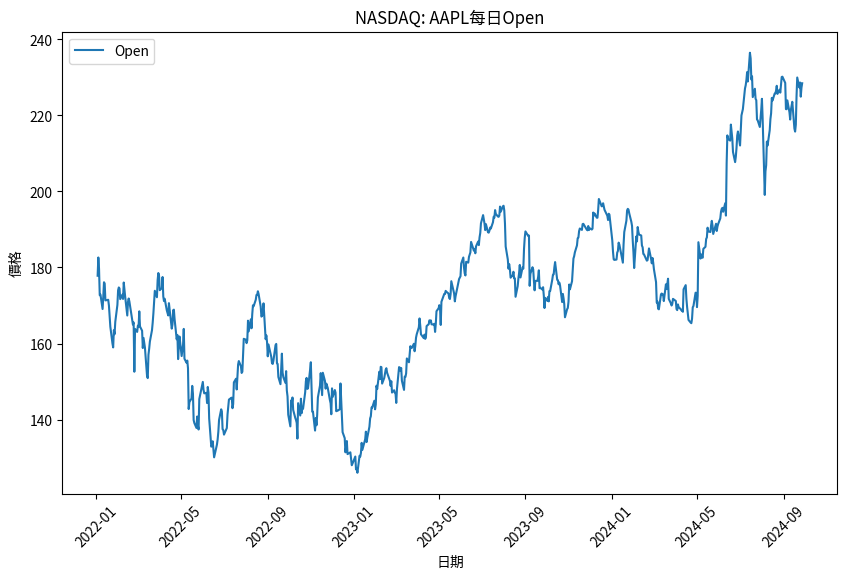

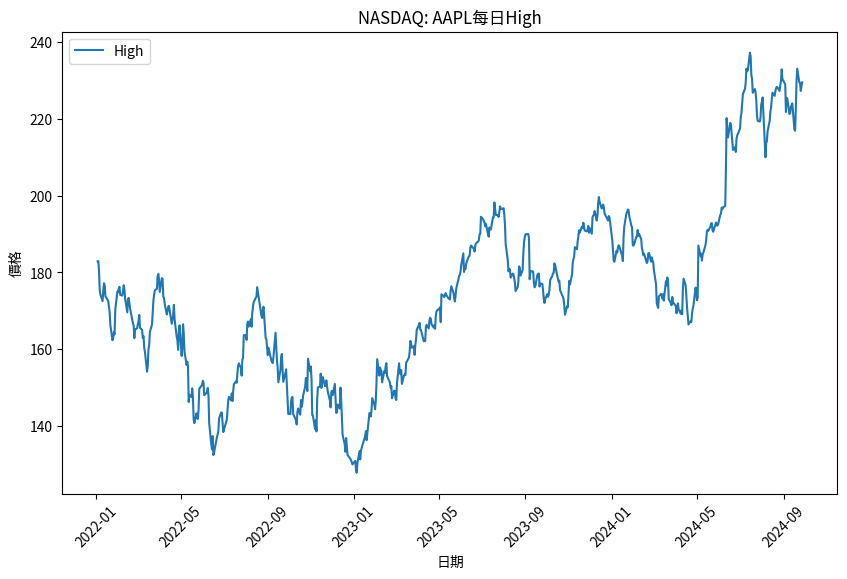

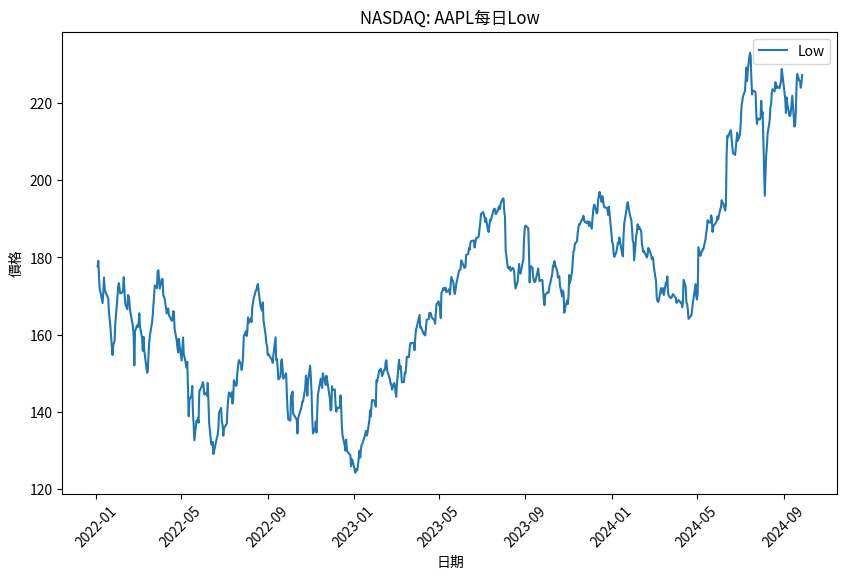

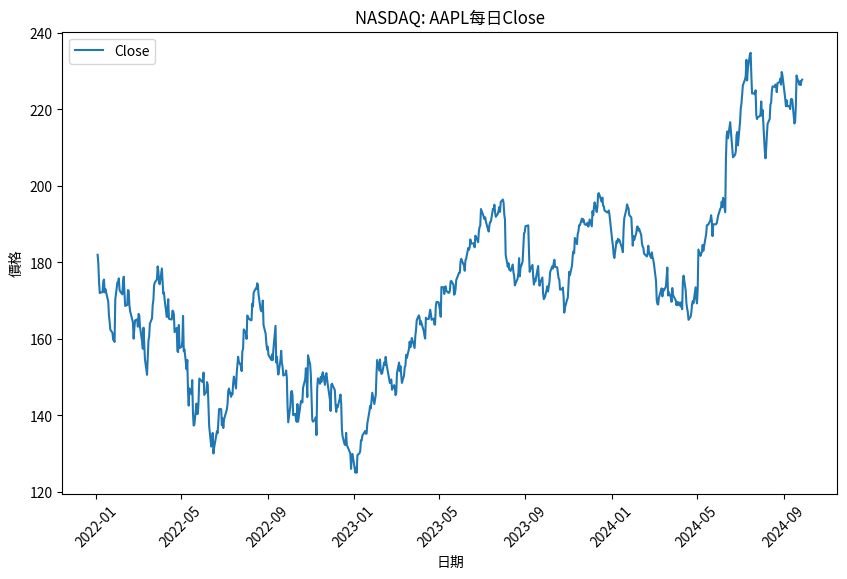

In [11]:
# 繪製收盤價圖表
plt.figure(figsize=(10, 6))
# 使用定義的函數繪製各個欄位
plot_stock_data(df_yahoo, 'Open', 'Open', 'NASDAQ: AAPL')
plot_stock_data(df_yahoo, 'High', 'High', 'NASDAQ: AAPL')
plot_stock_data(df_yahoo, 'Low', 'Low', 'NASDAQ: AAPL')
plot_stock_data(df_yahoo, 'Close', 'Close', 'NASDAQ: AAPL')

# **計算技術指標(SMA、RSI、MACD)**

In [12]:
import numpy as np

In [13]:
# 定義技術指標計算函數
def calculate_technical_indicators(df):

    # 計算簡單移動平均線(SMA)
    df['SMA_20'] = df['Close'].rolling(window=20).mean()

    # 計算相對強弱指標(RSI)
    def calculate_RSI(data, window=14):
        delta = data.diff(1)
        gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
        loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
        RS = gain / loss
        return 100 - (100 / (1 + RS))

    df['RSI_14'] = calculate_RSI(df['Close'], window=14)

    # 計算MACD
    df['EMA_12'] = df['Close'].ewm(span=12, adjust=False).mean()
    df['EMA_26'] = df['Close'].ewm(span=26, adjust=False).mean()
    df['MACD'] = df['EMA_12'] - df['EMA_26']
    df['Signal_Line'] = df['MACD'].ewm(span=9, adjust=False).mean()

    return df

# 假設 df 是你的股票資料 DataFrame
df = calculate_technical_indicators(df)

# 顯示包含技術指標的數據
print(df[['SMA_20', 'RSI_14', 'MACD', 'Signal_Line']])

      SMA_20     RSI_14      MACD  Signal_Line
0        NaN        NaN  0.000000     0.000000
1        NaN        NaN -0.007977    -0.001595
2        NaN        NaN -0.014136    -0.004104
3        NaN        NaN -0.050709    -0.013425
4        NaN        NaN -0.078786    -0.026497
..       ...        ...       ...          ...
660  122.525  59.375000  2.555539     1.578535
661  122.875  67.857143  2.471274     1.757083
662  123.225  69.642857  2.416978     1.889062
663  123.625  67.307692  2.346894     1.980628
664  123.925  65.384615  2.225354     2.029573

[665 rows x 4 columns]


In [14]:
# 假設 df 是你的股票資料 DataFrame
df_yahoo = calculate_technical_indicators(df_yahoo)

# 顯示包含技術指標的數據
print(df_yahoo[['SMA_20', 'RSI_14', 'MACD', 'Signal_Line']])

         SMA_20     RSI_14      MACD  Signal_Line
0           NaN        NaN  0.000000     0.000000
1           NaN        NaN -0.184273    -0.036855
2           NaN        NaN -0.707857    -0.171055
3           NaN        NaN -1.342941    -0.405432
4           NaN        NaN -1.811647    -0.686675
..          ...        ...       ...          ...
683  223.680001  56.174900  0.730428     0.305406
684  223.689501  61.264678  0.973629     0.439051
685  223.606501  57.022165  1.073304     0.565901
686  223.658001  61.964287  1.230904     0.698902
687  223.558001  62.207231  1.361890     0.831499

[688 rows x 4 columns]


# **繪製K線圖和技術指標**

In [15]:
import mplfinance as mpf

/usr/local/lib/python3.10/dist-packages/mplfinance/_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


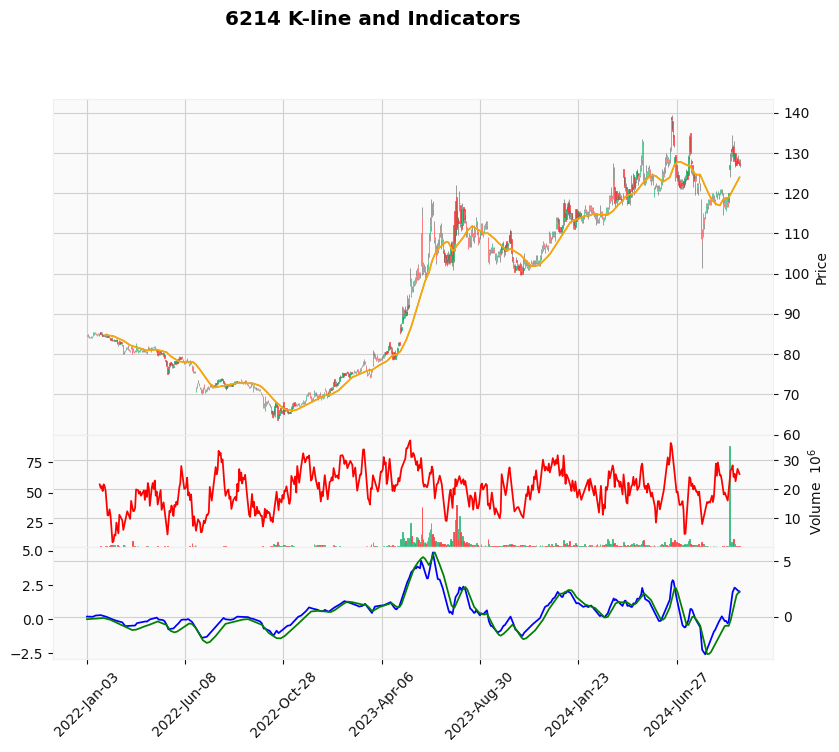

In [16]:
def plot_stock_with_indicators_combined(df):
    # 將欄位轉換為數字型態
    df['Open'] = pd.to_numeric(df['Open'], errors='coerce')
    df['High'] = pd.to_numeric(df['High'], errors='coerce')
    df['Low'] = pd.to_numeric(df['Low'], errors='coerce')
    df['Close'] = pd.to_numeric(df['Close'], errors='coerce')

    # 確保 'Date' 已經是索引，且是日期格式
    if 'Date' in df.columns:
        df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
        df.set_index('Date', inplace=True)

    # 構建技術指標 (SMA, RSI, MACD) 的繪圖對象
    apds = [
        mpf.make_addplot(df['SMA_20'], color='orange', panel=0),  # SMA20 放在主圖上
        mpf.make_addplot(df['RSI_14'], color='red', panel=1),     # RSI 放在第二個子圖 (panel=1)
        mpf.make_addplot(df['MACD'], color='blue', panel=2),      # MACD 放在第三個子圖 (panel=2)
        mpf.make_addplot(df['Signal_Line'], color='green', panel=2)  # Signal Line 放在第三個子圖
    ]

    # 使用 mplfinance 繪製 K 線圖以及技術指標
    mpf.plot(
        df,
        type='candle',
        style='yahoo',
        volume=True,
        addplot=apds,        # 加入技術指標
        title='6214 K-line and Indicators',
        panel_ratios=(3,1,1),  # 主圖和副圖的高度比例
        mav=(20),             # 繪製 20 天移動平均線
        figscale=1.2,         # 縮放比例
        figsize=(10,8)        # 圖形大小
    )
    df.reset_index(inplace=True)

# 假設 df 是你的股票數據 DataFrame，並且已經包含了技術指標（如 SMA、RSI、MACD）
plot_stock_with_indicators_combined(df)

/usr/local/lib/python3.10/dist-packages/mplfinance/_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


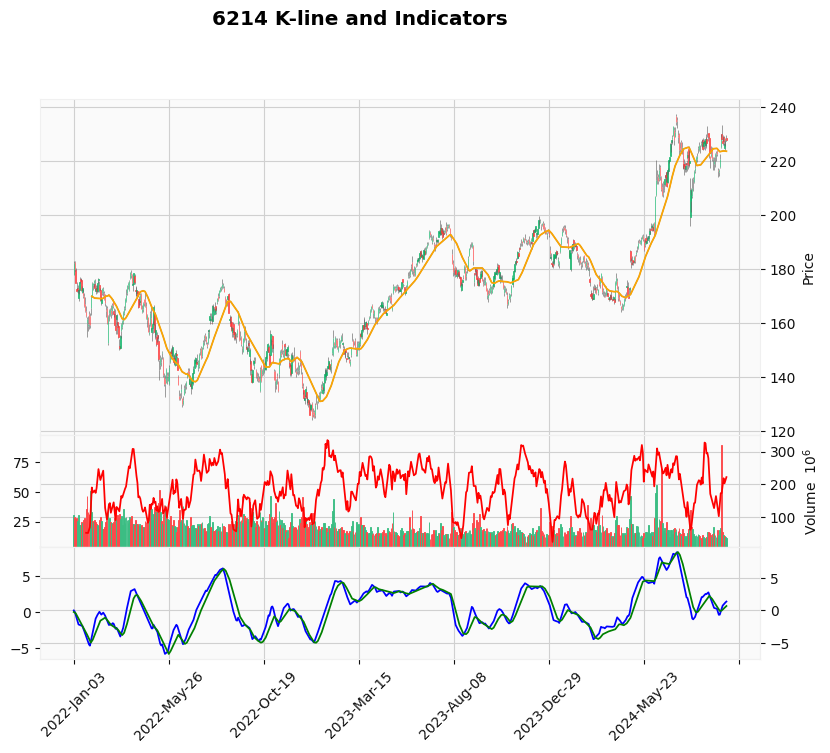

In [17]:
plot_stock_with_indicators_combined(df_yahoo)

# **Machine Learning(線性回歸、決策樹、隨機森林)**

In [18]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
import seaborn as sns

Close          1.000000
Low            0.998652
High           0.998274
Open           0.996770
SMA_20         0.986786
Signal_Line    0.328611
MACD           0.320467
Volume         0.248719
RSI_14         0.132699
Name: Close, dtype: float64


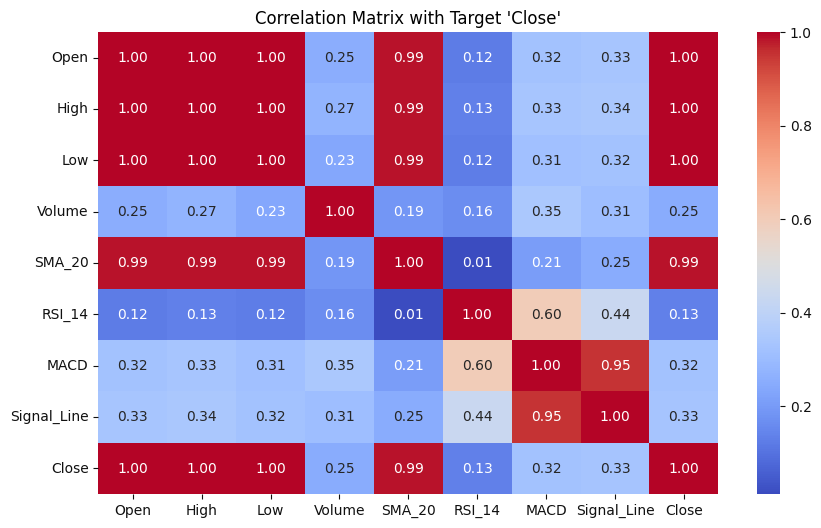

In [19]:
# 計算相關性矩陣
corr_matrix = df[['Open','High', 'Low', 'Volume','SMA_20', 'RSI_14', 'MACD', 'Signal_Line', 'Close']].corr()

# 只顯示與目標 'Close' 之間的相關性
print(corr_matrix['Close'].sort_values(ascending=False))

# 繪製相關性圖
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", cbar=True, linewidths=0)
plt.title("Correlation Matrix with Target 'Close'")
plt.grid(False)
plt.show()


In [20]:
def mean_absolute_percentage_error(y_true, y_pred):
    """計算 MAPE（平均絕對百分比誤差）"""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [21]:
def evaluate_model_performance(model, X_train, y_train, X_test, y_test):
    # 訓練集評估
    y_train_pred = model.predict(X_train)
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    train_mape = mean_absolute_percentage_error(y_train, y_train_pred)
    train_r2 = r2_score(y_train, y_train_pred)

    # 測試集評估
    y_test_pred = model.predict(X_test)
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    test_mape = mean_absolute_percentage_error(y_test, y_test_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    print(f"Training MSE: {train_mse}, Test MSE: {test_mse}")
    print(f"Training MAE: {train_mae}, Test MAE: {test_mae}")
    print(f"Training MAPE: {train_mape}%, Test MAPE: {test_mape}%")
    print(f"Training R²: {train_r2}, Test R²: {test_r2}")

    return train_mse, test_mse, train_mae, test_mae, train_mape, test_mape, train_r2, test_r2

In [22]:
n=30

def train_and_predict_stock(df, test_size=0.2, random_state=42):
    # 移除缺失值
    df = df.dropna()

    # 添加額外的時間特徵
    df['Year'] = df['Date'].dt.year
    df['Month'] = df['Date'].dt.month
    df['Weekday'] = df['Date'].dt.weekday

    # 找到最後 n 個時間點的數據
    last_n_data = df.iloc[-n:]

    # 將最後 30 個數據之前的數據作為訓練集
    train_data = df.iloc[:-n]

    # 準備訓練和測試集的特徵與目標
    features = ['Open','High', 'Low', 'SMA_20', 'Year', 'Month', 'Weekday']

    X_train = train_data[features]
    y_train = train_data['Close']
    X_test = last_n_data[features]
    y_test = last_n_data['Close']

    # 標準化處理特徵
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # 調整隨機森林參數
    param_grid = {
        'max_depth': [3, 5, 10, 15],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 5]
    }

    rf_model = RandomForestRegressor(random_state=random_state)
    grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
    grid_search_rf.fit(X_train_scaled, y_train)

    # 取得最佳的隨機森林模型
    best_rf_model = grid_search_rf.best_estimator_

    # 初始化Decision Tree模型
    dt_model = DecisionTreeRegressor(random_state=random_state)
    grid_search_dt = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
    grid_search_dt.fit(X_train_scaled, y_train)

    # 取得最佳決策樹模型
    best_dt_model = grid_search_dt.best_estimator_

    # 模型列表：線性回歸、隨機森林、決策樹
    models = {
        'Linear Regression': LinearRegression(),
        'Decision Tree': best_dt_model,
        'Random Forest': best_rf_model
    }

    # 存放結果的字典
    results = {}

    # 訓練和預測每個模型
    for model_name, model in models.items():
        model.fit(X_train_scaled, y_train)  # 使用標準化後的數據進行訓練
        y_pred = model.predict(X_test_scaled)  # 使用標準化後的數據進行預測

        # 評估訓練集和測試集的表現
        print(f'{model_name} performance:')
        train_mse, test_mse, train_mae, test_mae, train_mape, test_mape, train_r2, test_r2 = evaluate_model_performance(model, X_train_scaled, y_train, X_test_scaled, y_test)

        # 將結果存入字典
        results[model_name] = {
            'Train_MSE': train_mse,
            'Test_MSE': test_mse,
            'Train_MAE': train_mae,
            'Test_MAE': test_mae,
            'Train_MAPE': train_mape,
            'Test_MAPE': test_mape,
            'Train_R2': train_r2,
            'Test_R2': test_r2,
            'y_pred': y_pred
        }

    # 繪製預測結果
    plt.figure(figsize=(10,6))
    plt.plot(last_n_data['Date'], y_test, label='True Price', color='red')

    # 添加各模型的預測結果
    for model_name, result in results.items():
        plt.plot(last_n_data['Date'], result['y_pred'], label=f'{model_name} Predicted')

    plt.title(f'Stock Price Prediction - Last {n} Days')
    plt.legend()
    plt.show()

    return results

<ipython-input-22-dd5e009fbce1>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = df['Date'].dt.year
<ipython-input-22-dd5e009fbce1>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month'] = df['Date'].dt.month
<ipython-input-22-dd5e009fbce1>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/index

Linear Regression performance:
Training MSE: 0.4771410666965536, Test MSE: 0.6611456804957607
Training MAE: 0.4628547545813131, Test MAE: 0.6547743525031966
Training MAPE: 0.4649789725567022%, Test MAPE: 0.5300919353598058%
Training R²: 0.998842755776571, Test R²: 0.9708550241868029
Decision Tree performance:
Training MSE: 0.5623679212304823, Test MSE: 3.7607527517951684
Training MAE: 0.46287216137134585, Test MAE: 1.443511904761905
Training MAPE: 0.46553147075501944%, Test MAPE: 1.167389570951221%
Training R²: 0.9986360490142014, Test R²: 0.8342164953595468
Random Forest performance:
Training MSE: 0.25420151539117775, Test MSE: 1.3747228896198067
Training MAE: 0.30071378107573, Test MAE: 0.9372499999999988
Training MAPE: 0.3001383870994619%, Test MAPE: 0.7606315829202961%
Training R²: 0.9993834669538927, Test R²: 0.9393987338194906


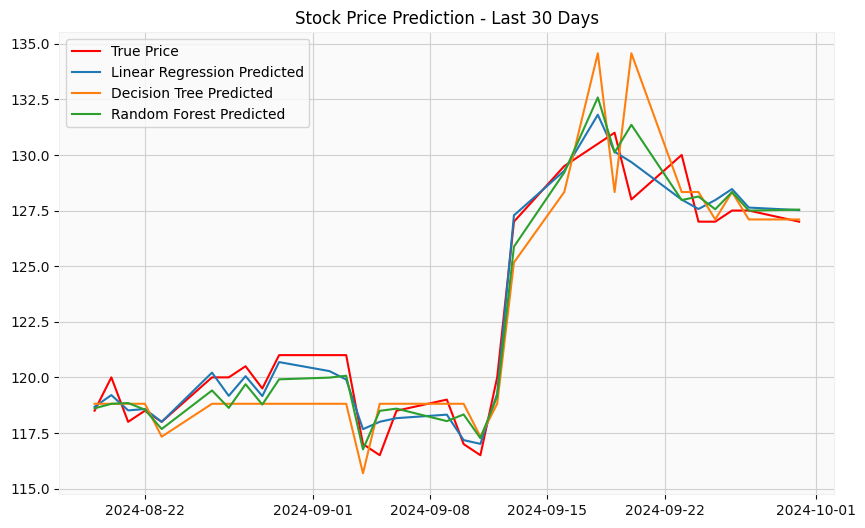

In [23]:
results = train_and_predict_stock(df)

<ipython-input-22-dd5e009fbce1>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = df['Date'].dt.year
<ipython-input-22-dd5e009fbce1>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month'] = df['Date'].dt.month
<ipython-input-22-dd5e009fbce1>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/index

Linear Regression performance:
Training MSE: 0.9179627226229577, Test MSE: 2.115366245932618
Training MAE: 0.7440986886476529, Test MAE: 1.1373142734960766
Training MAPE: 0.44855718088293506%, Test MAPE: 0.5079081448479935%
Training R²: 0.9981125301230555, Test R²: 0.8307294279262442
Decision Tree performance:
Training MSE: 0.048162008729671225, Test MSE: 8.485410363428915
Training MAE: 0.0996698713450242, Test MAE: 2.5236663818359375
Training MAPE: 0.058362582286337124%, Test MAPE: 1.1212317322253567%
Training R²: 0.9999009716424752, Test R²: 0.32100161413659
Random Forest performance:
Training MSE: 0.3824629202388802, Test MSE: 2.065504082430722
Training MAE: 0.472321591831904, Test MAE: 1.2241362819840447
Training MAPE: 0.2851360306257273%, Test MAPE: 0.5451355583794355%
Training R²: 0.9992135985228938, Test R²: 0.8347193738550069


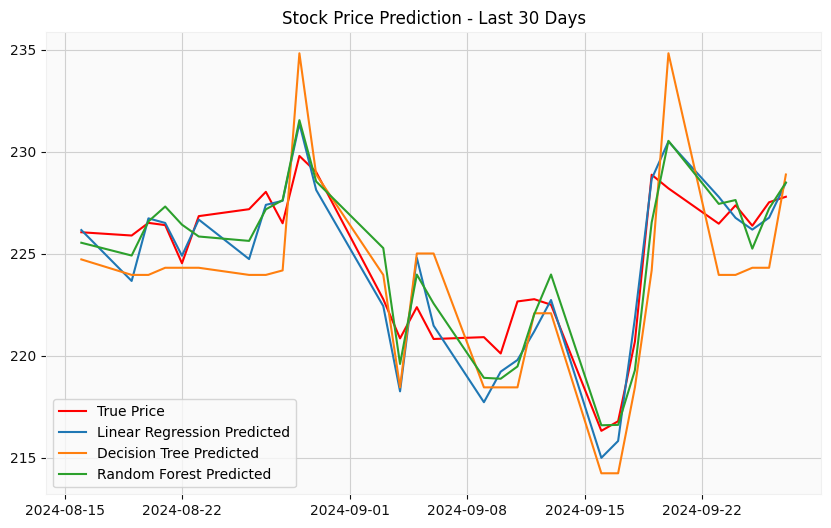

In [24]:
results_yahoo = train_and_predict_stock(df_yahoo)